In [157]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import numpy as np
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import spacy
from IPython.display import clear_output
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from nltk.stem import WordNetLemmatizer
import itertools
from gensim.models.tfidfmodel import TfidfModel

In [25]:
#df=pd.read_csv('https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv')
df=pd.read_csv('trump_tweets_of_interest.csv')
print(df.columns)


#filter=(df.hashtags.notnull()) & (df.hashtags!=None) & (df.hashtags.isin([
    #'MakeAmericaGreatAgain TRUMP',
#'DrainTheSwamp',
#'CrookedHiliary',
#'Debate2016',
#'WakeUpAmerica',
#'LieOfTheYear',
#'Israel',
#'Patriotic',
#'Snowden',
#'G7 NATO',
#'AfghanStrategy',
#'USA Japan',
#'AmericaFirst FamilyFirst',
#'CrookedHillary BigLeagueTruth DrainTheSwamp'
#]))
#df=df[filter]

#f.to_csv('trump_tweets_of_interest.csv')

#sns.countplot(x='hashtags', data=df)



Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'status_id',
       'created_at', 'user_id', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_create

In [26]:
nlp = spacy.load('en_core_web_sm')
stopwords=spacy.lang.en.stop_words.STOP_WORDS
    
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
p = re.compile(TOKENS_ALPHANUMERIC)
#nlp = spacy.load('en_core_web_sm')

search_list=[
'clinton',
'korea',
'isis',
'israel',
'obama',
'health',
'snowden',
'hillary',
'crooked',
'RADICAL',
'WikiLeaks',
'corruption',
'biden',
'families',
'family',
'economic',
'Mexico',
'Wall',
'education',
'epa',
'insurance',
'medicare',
'parenthood',
'refugees',
'exploration',
'justices',
'military',
'terrorist',
'afghanistan',
'iran',
'generals',
'veterns',
'china',
'jobs',
'trade',
'taxes',
'debt',
'dodd-frank',
'manufacturing',
'steel',
'auto',
'miniumum',
'relief',
'corporate',
'budget',
'regulation'
'immigration'
'cybersecurity',
'energy',
'abortion',
'guns',
'WakeUpAmerica',
'japan',
'LieOfTheYear',
'oil',
'pipeline'
   
#'book'
]
word_list=[]
stop_words=['nan','tinyurl','http','com','cont','t','co','https']
exclude_found=['hotroddergirl','vote','MATTER','BonnieKit','purpleheartwife'
    'Foshay504','scorpio5053'
]
df['sentiment_polarity']=0
df['sentiment_subjectivity']=0
df['sentence']=np.nan
df['found_flag']=0
clear_output(wait=True)
for key,item in df[['text','hashtags','retweet_text']].iterrows():
    str_buffer=item.text.replace(" it's "," it is ")
    str_buffer=str_buffer.replace(" won't "," will not ")
    str_buffer=str_buffer.replace(" don't "," do not ")
    str_buffer=str_buffer.replace(" aren't "," are not ")
    str_buffer=str_buffer.replace(" would't "," would not ")
    str_buffer=str_buffer.replace(" didn't "," did not ")
    str_buffer=str_buffer.replace(" you're "," you are ")
    str_buffer=str_buffer.replace(" I'm "," i am ")
    str_buffer=str_buffer.replace(" they're "," they are")
    str_buffer = re.sub(r'[^\w\s]', ' ', str_buffer) 
    
    word_list=nltk.word_tokenize(str_buffer)
    #word_list=p.findall(str_buffer)

    for word in list(word_list):  # iterating on a copy since removing will mess things up
        if word in stop_words:
            word_list.remove(word)
        
    sentence=' '.join(word_list)
    for word in word_list:
        if word in search_list:
            if word not in exclude_found:
                df.loc[key,'found_flag']=1
                #print(sentence+'\n\n')
            break
            


    #doc=nlp(sentence)
    #tokens=[token.text for token in doc]

    #lemmas =[token.lemma_ for token in doc]
    #lemmas =[lemma for lemma in lemmas
    #    if (lemma.isalpha() )
    #     and lemma not in stopwords
    #    ]
    #sentence2=' '.join(lemmas)
    #print(sentence2)

    my_valance=TextBlob(sentence)
    df.loc[key,'sentence']=sentence
    #df.loc[key,'sentence2']=sentence2
    df.loc[key,'sentiment_polarity']=my_valance.sentiment.polarity
    df.loc[key,'sentiment_subjectivity']=my_valance.sentiment.subjectivity
    #print("1.{}\n2.{}".format(df.loc[key,'sentence'],df.loc[key,'text']))

pd.options.display.max_colwidth = 100
print("Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual\n\n")
filter=df['found_flag']==1
filter=filter & ((df['sentiment_polarity']<0.2) & (df['sentiment_polarity']>0)) | (df['sentiment_polarity']>0.8)

for key,item in df[filter][['hashtags','text','sentence','sentiment_polarity','sentiment_subjectivity']].iterrows():
    print("{} {} {} {}\n".format(item.hashtags,item.sentence,item.sentiment_polarity,item.sentiment_subjectivity))
    

df=df[filter]    



Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual


nan Tonight I trade places with Larry King kingsthings and interview him on the 25th anniversary of his show 9PM on CNN featuring best clips 1.0 0.3

nan The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb 0.1875 0.5

nan The safest way to preserve Medicare is with a robust and vibrant economy We should lower corporate and capital gain taxes immediately 0.08333333333333333 0.16666666666666666

TimeToGetTough The thing about high corporate tax rates is that in the end companies aren the ones who foot the bill consumers do TimeToGetTough 0.08 0.26999999999999996

nan Third quarter GDP was lowered to 2 There will not be any economic recovery until BarackObama is defeated 0.1 0.1

nan The new job figures do not include 315 000 people who have given up looking for jobs 0.13636363636363635 0.45454545454545453

nan The Super Committee is finding ways

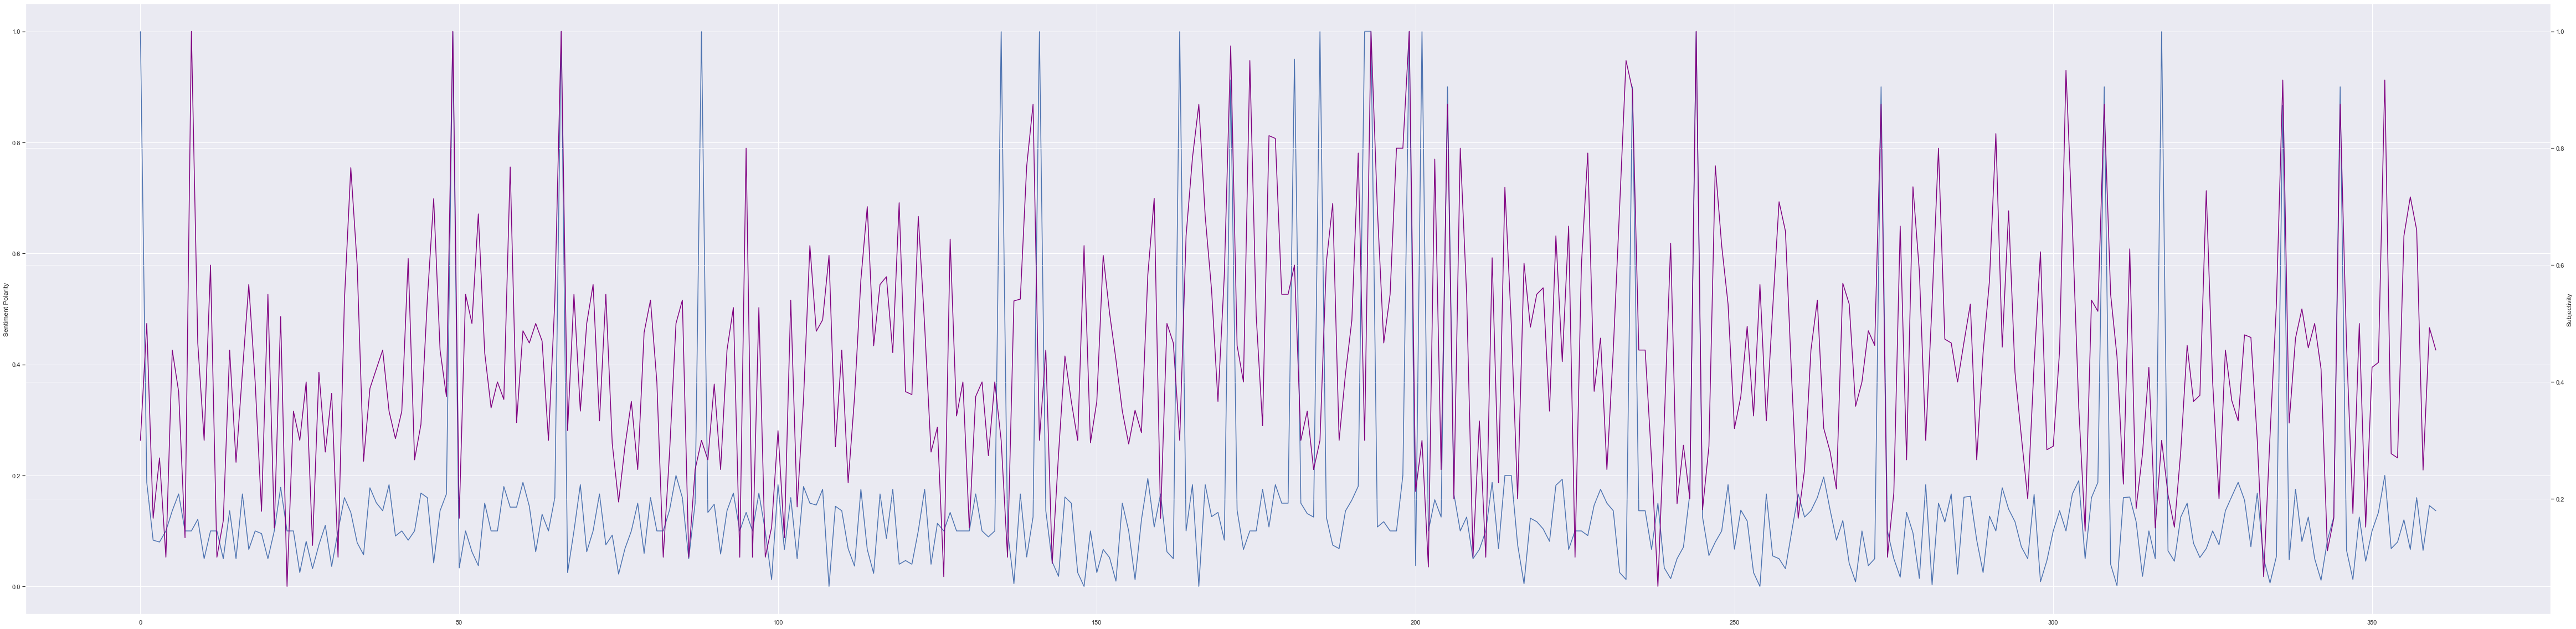

In [27]:
#df.to_csv('trump_tweets_of_interest.csv')
sns.set(rc={'figure.figsize':(81.7,20.27)})
x=np.arange(len(df))
y=df['sentiment_polarity']
fig, ax= plt.subplots()
ax.plot(x,y)
plt.ylabel('Sentiment Polarity')
ax2=ax.twinx()
y=df['sentiment_subjectivity']
ax2.plot(x,y,color='purple')
ax2.set_ylabel('Subjectivity')
plt.show()

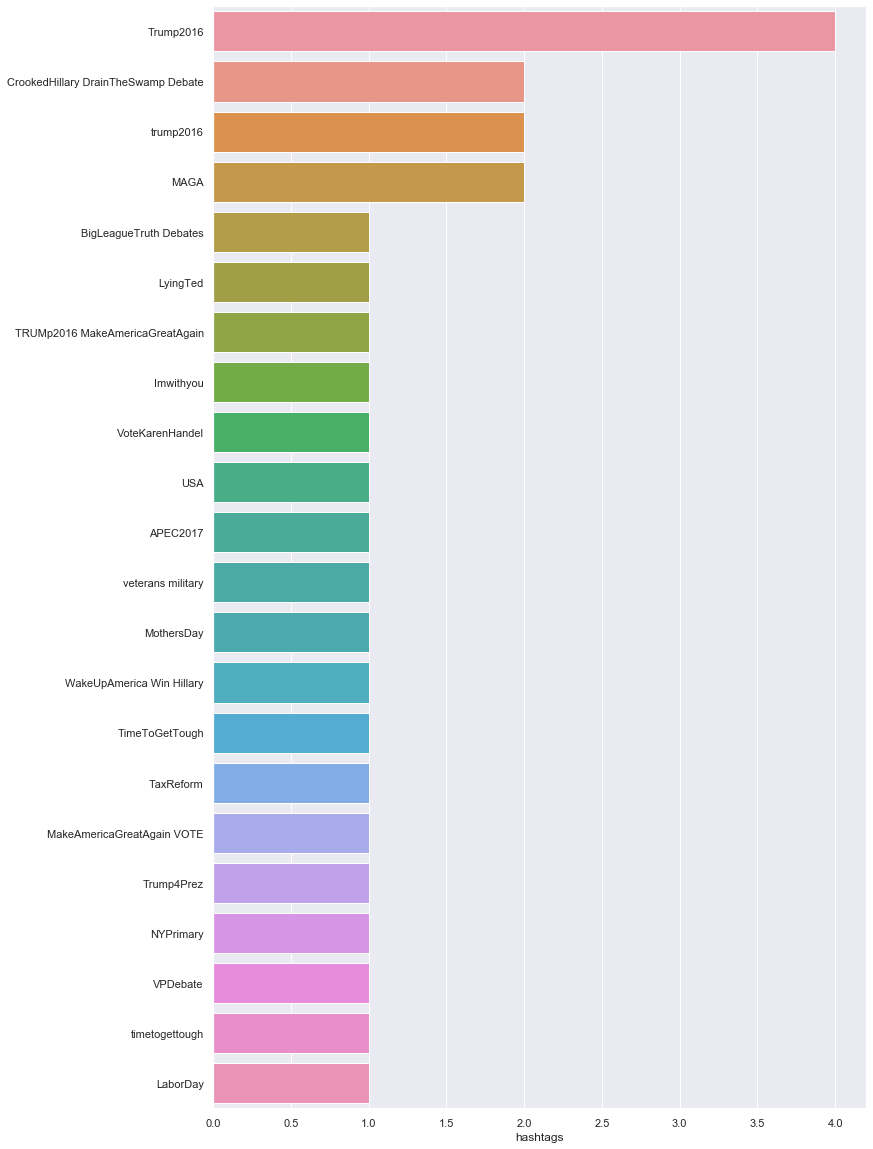

In [28]:
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.barplot(y=df.hashtags.value_counts().index, x=df.hashtags.value_counts())
    
LABELS=['hashtags']


In [29]:
def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar sentences
    sim_scores = sim_scores[1:4]
    # Get the movie indices
    sentence_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df['sentence'].iloc[sentence_indices]
def normalized_term_frequency(word, document):

    raw_frequency = document.count(word)

    if raw_frequency == 0:

        return 0

    return 1 + math.log(raw_frequency)

def docs_contain_word(word, documents):

    counter = 0

    for document in list_of_documents:

        if word in document:

            counter+=1

    return counter



def get_vocabulary(documents):

    vocabulary = set([word for document in documents for word in document])	

    return vocabulary



def inverse_document_frequency(documents, vocabulary):

    idf = {}

    for word in vocabulary:

        contains_word = docs_contain_word(word, documents)

        idf[word] = 1 + math.log(len(documents)/(contains_word))
    return idf

def tf_idf(search_keys, dataframe, label):

    tfidf_vectorizer = TfidfVectorizer()
    
    #fit_transform method converts the given text into TF-IDF scores for all the documents. 

    tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])

    search_query_weights = tfidf_vectorizer.transform([search_keys])


    return search_query_weights, tfidf_weights_matrix

def cos_similarity(search_query_weights, tfidf_weights_matrix):


    cosine_distance = cosine_similarity(query, tfidf_matrix)

    similarity_list = cosine_distance[0]

  
    return similarity_list

def most_similar(similarity_list, min_talks=1):

    most_similar= []

  

    while min_talks > 0:

        tmp_index = np.argmax(similarity_list)

        most_similar.append(tmp_index)

        similarity_list[tmp_index] = 0

        min_talks -= 1

    return most_similar

def word_count(string) :
    words= string.split()
    return len(words)


def avg_word_length(x):
    words=x.split()
    word_lengths= [len(word) for word in words]

    avg_word_length= sum(word_lengths)/len(words)
    return(avg_word_length)

def create_tokenizer_score(new_series, train_series, tokenizer):
    """
    return the tf idf score of each possible pairs of documents
    Args:
        new_series (pd.Series): new data (To compare against train data)
        train_series (pd.Series): train data (To fit the tf-idf transformer)
    Returns:
        pd.DataFrame
    """

    train_tfidf = tokenizer.fit_transform(train_series)
    new_tfidf = tokenizer.transform(new_series)
    X = pd.DataFrame(cosine_similarity(new_tfidf, train_tfidf), columns=train_series.index)
    X['ix_new'] = new_series.index
    score = pd.melt(
        X,
        id_vars='ix_new',
        var_name='ix_train',
        value_name='score'
    )
    return score

In [30]:
#print(df)
df['word_count']=df['sentence'].apply(word_count)
df['avg_word_length']=df['sentence'].apply(avg_word_length)
#print(df.head())
#print(df.shape)

a_sentence="Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade"
print("SELECTED SENTENCE: " + a_sentence)


print(a_sentence)
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['sentence'])
# Convert matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
# Map the column names to vocabulary 
tfidf.columns = tfidf.get_feature_names()

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


df2=pd.DataFrame()
#indices=np.arange(0,len(sentences))
df2['Sentence']=df['sentence']

indices = pd.Series(df2.index, index=df2['Sentence']).drop_duplicates()
#results=get_recommendations(a_sentence,cosine_sim,indices)
#for result in enumerate(results):
#       print (result)

SELECTED SENTENCE: Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade
Mexican leaders and negotiators are much tougher and smarter than those of the U S Mexico is killing us on jobs and trade


In [33]:
clear_output(wait=True)
print('This section will show similar sentences together')
sentences=df['sentence']

train_set=pd.Series(sentences)

#for match_index in np.arange(len(sentences)):
match_index=0
for sentence in sentences:
    test_set=pd.Series(sentence)
    #print('\n\n{}***Sentence****\n{}'.format(match_index,sentences[match_index]))
    print('\n\n{}***Sentence****\n{}'.format(match_index,sentence))

    tokenizer = TfidfVectorizer() # initiate here your own tokenizer (TfidfVectorizer, CountVectorizer, with stopwords...)
    score = create_tokenizer_score(train_series=train_set, new_series=test_set, tokenizer=tokenizer)
    #print(score)
    index=0
    matches=[]

    for index in np.arange(0,len(score)):

        value=score.loc[index,'score']
        #print (index,value)
        if (value>0.20) & (index!=match_index) :
            matches.append(index)
            print("\n*",sentences.iloc[index])
            #matches.append(index)
            
    match_index+=1
        
#print(matches)

This section will show similar sentences together


0***Sentence****
Tonight I trade places with Larry King kingsthings and interview him on the 25th anniversary of his show 9PM on CNN featuring best clips


1***Sentence****
The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb

* Gas prices are still too high We really need to pressure OPEC to lower the price of oil

* Keystone must be approved through Congress BarackObama is costing America over 20 000 jobs and driving the price of gas high

* Keystone pipeline would create 20 000 direct jobs another 50 000 jobs servicing the pipeline 700 000 barrels a oenlVsr8

* OPEC has just raised oil to over 102 Barrel And BarackObama still will not approve the Keystone Pipeline Does he want high gas prices

* Will the Keystone XL pipeline finally be approved Will create over 100 000 jobs and make us more energy independent

* So sad that Obama rejected Keystone Pipeline Thousands of jobs good for the environm

Obama deserves much less credit for the killing of Bin Laden The praise goes to our brave military and intelligence officers

* The military and Navy Seals should be given more credit for Bin Laden s death not Obama who works hard to take Awn3F7tS


37***Sentence****
Where is the main stream media reporting on Univision s new expose of Fast and Furious Too busy looking at Mitt s taxes


38***Sentence****
After BarackObama s speech tonight which should be well delivered reality will hit Friday morning when the new jobs report is released

* A day after BarackObama released a trillion dollar budget deficit he is hosting China s future leader VP XiJinping America s new reality


39***Sentence****
Why is the Pentagon wasting precious dollars on going green Complete waste We need the best amp easiest fuel for our military


40***Sentence****
Obama called August s job report progress Overall 96K new jobs amp over 173K new people on food stamps OD3nBmsK


41***Sentence****
Our 16T national de



73***Sentence****
The Fed is considering issuing even more US bond debt into the market Not good

* The Fed is destroying the dollar When inflation hits the economy then even more jobs will go overseas


74***Sentence****
Iran s threats are no excuse for the 9 month high price of oil OPEC is ripping us off while BarackObama watches wYSTMETc

* Gas prices are still too high We really need to pressure OPEC to lower the price of oil

* Why is oil at a record high OPEC amp the oil speculators continue to rip us off

* The new reality China s demand for oil now controls the market lqKTTsyCoQ And OPEC gets away with ripping us off at 105


75***Sentence****
Our ally Canada wants to send their oil down south to us BarackObama is forcing Canada to send it west to China

* Canada will now sell its oil to China because BarackObama rejected Keystone At least China knows a good deal when they see it


76***Sentence****
A day after BarackObama released a trillion dollar budget deficit he is hosti


* My major hotel conversion of The Old Post Office on Pennsylvania Avenue in D C is under budget and ahead of schedule Should be U S A


110***Sentence****
The new reality China s demand for oil now controls the market lqKTTsyCoQ And OPEC gets away with ripping us off at 105

* Iran s threats are no excuse for the 9 month high price of oil OPEC is ripping us off while BarackObama watches wYSTMETc

* Why is oil at a record high OPEC amp the oil speculators continue to rip us off


111***Sentence****
purplerapezebra realDonaldTrump also new products they are going back to the pre steve jobs days And I have stock


112***Sentence****
Consumer prices rose in June due to OPEC WIp3fMm2DI OPEC continues to rip off hard working American families daily

* Why is oil at a record high OPEC amp the oil speculators continue to rip us off


113***Sentence****
DatDudeHead realDonaldTrump mr trump would open up the keystone pipeline if he were prez bc he makes things happen trump2016 True


114***Sen



149***Sentence****
JAdamsEden realDonaldTrump Articulate amp concise as ever leave it to Trump to identify the clear amp present economic enemy MEXICO


150***Sentence****
piersmorgan Russell has nothing going for himself except for energy amp aggression Without that he would be dead a first class dummy

* MATAblets Without passion you do not have energy without energy you have nothing Donald Trump Lean from the best


151***Sentence****
Lightweight AGSchneiderman is driving business amp jobs out of NY Only wants self publicity a total loser


152***Sentence****
Real estate taxes are far too high BriarcliffManor Westchester A total joke how they waste money Replace Mayor Vescio

* PhilMickels0n_ is right California taxes are far too high It s ridiculous


153***Sentence****
Obamacare puts poor people on a form of government run single payer health insurance that many doctors do not take Avik

* Make no mistake Obamacare is the first step towards changing our health system into single



198***Sentence****
Wow FoxNews poll just came out 1 with 26 Almost as importantly I am the strongest on economic issues by far Trump2016


199***Sentence****
voxdotcom Trump has figured out Jeb Bush s greatest weakness as a candidate and it is not his energy level l4V3EoxXlv


200***Sentence****
traceclmbs82 FoxNews Pampered GeorgeWill who never had a real job has no problem w USA losin jobs 2 foreign countries FoxNewsSunday


201***Sentence****
MiriamRoseMc TRUMp2016 would be the best for the country jobs trade and taxes all others are status quo MakeAmericaGreatAgain


202***Sentence****
Do you believe this Iran wants to trade our 3 prisoners not 4 for 19 prisoners held by the U S Should have been let go with last deal


203***Sentence****
Lightweight Senator Marco Rubio is VERY weak on immigration knows nothing about finance and would be incapable of making great trade deals


204***Sentence****
The hedge fund guys gals have to pay higher taxes ASAP They are paying practically not


* As Senator Clinton promised 200 000 jobs in Upstate New York her efforts fell flat I2WqZb5N8P i5S3mtJWpe


237***Sentence****
Paul Ryan a man who doesn know how to win including failed run four years ago must start focusing on the budget military vets etc


238***Sentence****
WikiLeaks proves even the Clinton campaign knew Crooked mishandled classified info but no one gets charged RIGGED FgGxDsS0a1


239***Sentence****
Paul Ryan should spend more time on balancing the budget jobs and illegal immigration and not waste his time on fighting Republican nominee


240***Sentence****
Very little pick up by the dishonest media of incredible information provided by WikiLeaks So dishonest Rigged system

* The dishonest media does not report that any money spent on building the Great Wall for sake of speed will be paid back by Mexico later


241***Sentence****
RT mike_pence There s one clear choice in this election to create jobs and grow the American economy VPDebate cvv0cK6Fbt

* This is the


* ScottWalker is a nice guy but not presidential material Wisconsin is in turmoil borrowing to the hilt and doing poorly in jobs etc

* At some point the Fake News will be forced to discuss our great jobs numbers strong economy success with ISIS the border amp so much else


277***Sentence****
11phenomenon LyingTed blames realDonaldTrump for so many things I am starting to think he is having a mental health crisis


278***Sentence****
It is amazing how often I am right only to be criticized by the media Illegal immigration take the oil build the wall Muslims NATO


279***Sentence****
Ohio is losing jobs to Mexico now losing Ford and many others Kasich is weak on illegal immigration We need strong borders now

* Hillary Clinton is weak on illegal immigration among many other things She is strong on corruption corruption is what she s best at


280***Sentence****
North Carolina lost 300 000 manufacturing jobs and Ohio lost 400 000 since 2000 Going to Mexico etc NO MORE IF I WIN WE WILL 


* South Korea is absolutely killing us on trade deals Their surplus vs U S is massive and we pay for their protection WHO NEGOTIATES

* RT IvankaTrump The Administration is committed to supporting military spouses in the workforce Thanks Kim for sharing your story


304***Sentence****
This is the right TAX CUT the RIGHT TIME We will ALL succeed amp grow TOGETHER as one team one people amp one American family TaxReform rtLWANJjIQ

* RT mike_pence There s one clear choice in this election to create jobs and grow the American economy VPDebate cvv0cK6Fbt

* This week the Senate can join the House amp take a strong stand for the Middle Class families who are the backbone of America Together we will give the American people a big beautiful Christmas present a massive tax cut that lets Americans keep more of their HARD EARNED MONEY 9jddEW2Oo5


305***Sentence****
RT Scavino45 POTUS realDonaldTrump in the Oval Office w senior U S military leaders prior to dinner hosted by the President amp Fi


* Our trade deficit just jumped in May to the second highest level on record aENXRcvMWg FAIR trade not free trade I TOLD YOU


332***Sentence****
because he doesn even live there He wants to raise taxes and kill healthcare On Tuesday VoteKarenHandel

* When the economy is bad BarackObama wants to raise taxes When the economy is good BarackObama wants to raise taxes Notice a trend


333***Sentence****
RT VP Our President is choosing to put American jobs American consumers American energy and American industry first y2Op

* RT mike_pence There s one clear choice in this election to create jobs and grow the American economy VPDebate cvv0cK6Fbt

* We are building our future with American hands American labor American iron aluminum and steel Happy LaborDay lyvtNfQ5IO

* We re going to use American steel we re going to use American labor we are going to come first in all deals Ty5011oJjU yC5ZuVavxK


334***Sentence****
way up Regulations way down 600 000 new jobs added Unemployment down to 

In [49]:
stopwords=spacy.lang.en.stop_words.STOP_WORDS
for sentence in sentences:
    tokens=word_tokenize(sentence)
    lower_tokens = [token.lower() for token in tokens if (len(token)>3) & ((token in stopwords)==False) ]
 
    wordnet_lemmatizer = WordNetLemmatizer()

    # Lemmatize all tokens into a new list: lemmatized
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in lower_tokens]

    counter=Counter(lemmatized)
    print(counter.most_common(3))

[('tonight', 1), ('trade', 1), ('place', 1)]
[('keystone', 1), ('pipeline', 1), ('create', 1)]
[('safest', 1), ('preserve', 1), ('medicare', 1)]
[('thing', 1), ('high', 1), ('corporate', 1)]
[('third', 1), ('quarter', 1), ('lowered', 1)]
[('figure', 1), ('include', 1), ('people', 1)]
[('super', 1), ('committee', 1), ('finding', 1)]
[('october', 1), ('foreclosure', 1), ('increase', 1)]
[('national', 1), ('debt', 1), ('grown', 1)]
[('china', 1), ('military', 1), ('buildup', 1)]
[('printing', 1), ('money', 1), ('short', 1)]
[('spread', 1), ('economic', 1), ('growth', 1)]
[('wall', 1), ('street', 1), ('protester', 1)]
[('watched', 1), ('potus', 1), ('speech', 1)]
[('raising', 1), ('tax', 1), ('create', 1)]
[('china', 1), ('tenth', 1), ('natural', 1)]
[('time', 1), ('military', 1), ('spending', 1)]
[('speech', 1), ('create', 1), ('job', 1)]
[('downgrade', 1), ('direct', 1), ('result', 1)]
[('china', 1), ('corporate', 1), ('espionage', 1)]
[('learn', 1), ('debt', 1), ('deal', 1)]
[('need', 1

In [55]:

for sentence in sentences:
    doc=nlp(sentence)
    mylist=[]
    for token in doc:
        if (token.pos_ == 'NOUN') & (len(token)>2):
            mylist.append(token)
    counter=Counter(mylist)
    print(counter.most_common(3))            

[(Tonight, 1), (places, 1), (kingsthings, 1)]
[(pipeline, 1), (jobs, 1), (gas, 1)]
[(way, 1), (economy, 1), (capital, 1)]
[(thing, 1), (tax, 1), (rates, 1)]
[(quarter, 1), (recovery, 1)]
[(job, 1), (figures, 1), (people, 1)]
[(ways, 1), (taxes, 1), (mistake, 1)]
[(foreclosure, 1), (increase, 1), (month, 1)]
[(debt, 1), (gallon, 1), (gas, 1)]
[(buildup, 1), (threat, 1), (defense, 1)]
[(money, 1), (term, 1), (solution, 1)]
[(way, 1), (growth, 1), (taxes, 1)]
[(protesters, 1), (economy, 1)]
[(POTUS, 1), (speech, 1), (tax, 1)]
[(taxes, 1), (jobs, 1), (answers, 1)]
[(tenth, 1), (resources, 1), (energy, 1)]
[(time, 1), (spending, 1), (enemies, 1)]
[(speeches, 1), (jobs, 1), (wouldn, 1)]
[(downgrade, 1), (result, 1), (budget, 1)]
[(espionage, 1), (threat, 1), (economy, 1)]
[(debt, 1)]
[(growth, 1), (jobs, 1), (ribbon, 1)]
[(marcorubio, 1), (taxpayers, 1), (taxes, 1)]
[(taxes, 1), (credit, 1), (year, 1)]
[(capital, 1), (gains, 1), (tax, 1)]
[(family, 1), (price, 1)]
[(day, 1), (property, 1), (

[(fools, 1), (country, 1), (work, 1)]
[(guy, 1), (material, 1), (turmoil, 1)]
[(greta, 1), (time, 1), (business, 1)]
[(scorpio5053, 1), (realDonaldTrump, 1), (deal, 1)]
[(recruitment, 1), (centers, 1), (bases, 1)]
[(leaders, 1), (negotiators, 1), (jobs, 1)]
[(criminals, 1), (death, 1), (lives, 1)]
[(jobs, 1), (workforce, 1), (manufacturing, 1)]
[(leader, 1), (negotiators, 1), (leader, 1)]
[(Univision, 1), (government, 1)]
[(purpleheartwife, 1), (realDonaldTrump, 1), (caregivers, 1)]
[(trade, 1), (deficits, 1), (jobs, 1)]
[(planet, 1), (earth, 1), (deal, 1)]
[(people, 1), (amp, 1), (veterans, 1)]
[(debt, 1), (military, 1), (time, 1)]
[(hotel, 1), (conversion, 1), (budget, 1)]
[(night, 1), (leadership, 1), (city, 1)]
[(program, 1), (JOB, 1), (jobs, 1)]
[(realDonaldTrump, 1), (Policies, 1)]
[(courage, 1), (coruption, 1), (respect, 1)]
[(guy, 1), (who, 1), (sense, 1)]
[(mbabramson, 1), (realDonaldTrump, 1), (candidate, 1)]
[(run, 1), (individual, 1), (right, 1)]
[(business, 1), (men, 1), (

In [183]:
tokenized_docs=[]
ignore_words=[
'g2nvr2zh'
,'g2nvr2zh'
,'zezyhua4'
,'3kgjncem'
,'zezyhua4'
,'dafnzbva'
,'dhdykwb2'
,'vjwvpoyk'
,'vpbiden'
,'vcvetg5z'
,'e_chenault07'
,'jaimesells'
,'terreldactyl'
,'tundraswans'
,'scamster'
,'sldej9ks'
,'xijinping','timetogettough','flgovscott','barackobama','realdonaldtrump','trump2016']
#print(stopwords)
for sentence in sentences:
    tokens=word_tokenize(sentence)
#print(tokenized_docs)
    doc=[token.lower() for token in tokens if 
         (len(token)>3) 
         ]
    doc=[token for token in doc if (token not in ignore_words)]
    doc=[token for token in doc if (token not in stop_words)]
         
    tokenized_docs.append(doc)

dictionary=Dictionary(tokenized_docs)
print('This will create an id for each token in the corpus')
#print(dictionary.token2id)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
#print(corpus)
print("Each document is converted into a bag of words indicating the frequency of each token")
#for sentence_list in corpus:
#   [print(dictionary.get(item[0])) for item in sentence_list]

#for doc in corpus:
#    bow_doc = sorted(doc,key=lambda w: w[1], reverse=True)
#    for word_id, word_count in bow_doc[:3]:
#        print(dictionary.get(word_id),word_count)
        

total_word_count=dict()
for word_id, word_count in itertools.chain.from_iterable(corpus):
    if word_id not in total_word_count:
        total_word_count[word_id] = 0 
    else:
        total_word_count[word_id] += word_count

sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:10]:
    print(dictionary.get(word_id),word_count)
#print(sorted_word_count)

This will create an id for each token in the corpus
Each document is converted into a bag of words indicating the frequency of each token
jobs 79
will 69
military 50
with 49
that 46
taxes 42
obama 34
economic 34
have 34
this 32


In [184]:

tfidf=TfidfModel(corpus)

In [186]:
print("tf-idf weight of .35 is used to find topics")

categories=[]
for index in np.arange(len(corpus)):
    for item in tfidf[corpus[index]]:
        #print(dictionary.get(item[0]),item[1])
        if item[1]>0.35:
            categories.append(dictionary.get(item[0]))
            
print(sorted(categories))            

tf-idf weight of .35 is used to find topics
['06fs6g5y', '11phenomenon', '1cott0rpy7', '2000', '2011', '2013', '2014_vince', '3e8yw46znl', '4kmiddlebrook', '58vtvh02dw', '790k', '8mkucg8', '9wotxcby49', 'abandon', 'abc2020', 'aberdeencc', 'aberdeenshire', 'about', 'about', 'absolutely', 'abuse', 'accomplished', 'according', 'accountable', 'activity', 'addition', 'admire', 'afford', 'afford', 'agreed', 'agschneiderman', 'algae', 'allow', 'almost', 'amassed', 'ambs', 'american', 'american', 'andersoncooper', 'andrew', 'angry', 'answers', 'anybody', 'apart', 'appetite', 'approve', 'approved', 'approved', 'aqao9zgunz', 'aren', 'arenot', 'armed', 'arms', 'ashevillelaura', 'asmhkore', 'assad', 'audit', 'avenue', 'back', 'badly', 'balance', 'bank', 'bankrupted', 'barbarajwalters', 'barrel', 'barrels', 'bashar', 'beat', 'behind', 'believes', 'below', 'benedwards55', 'benedwards55', 'benefits', 'bergdahl', 'bigger', 'bill', 'billmoyers', 'blames', 'blind', 'bloom', 'blue', 'bluejoni', 'bond', '